In [1]:
import polars as pl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from complex_task_gen.src.machine_learning.evaluation.pass_k import PassAtKCalculator

In [3]:
df_evaluate_pass_k_log_p = pd.read_csv("/Users/mannes/thesis/complex_task_gen/src/machine_learning/output/evaluate_pass_k_log_p.csv")
df_log_p = pd.read_csv("/Users/mannes/thesis/complex_task_gen/src/machine_learning/output/log_probabilities.csv")

In [4]:
df_evaluate_pass_k_log_p.head(5)

,question_id,sample_number,question,actual_answer,generated_answer,correct_prediction,actual_full_answer,generated_full_answer
0,0,0,Natalia sold clips to 48 of her friends in Apr...,72,72.0,True,Natalia sold 48/2 = <<48/2=24>>24 clips in May...,Let's solve this problem step by step.\n\n**St...
1,0,1,Natalia sold clips to 48 of her friends in Apr...,72,72.0,True,Natalia sold 48/2 = <<48/2=24>>24 clips in May...,### Step-by-Step Solution\n\n**Step 1: Determi...
2,0,2,Natalia sold clips to 48 of her friends in Apr...,72,72.0,True,Natalia sold 48/2 = <<48/2=24>>24 clips in May...,### Step-by-Step Solution\n\n**Step 1: Determi...
3,0,3,Natalia sold clips to 48 of her friends in Apr...,72,72.0,True,Natalia sold 48/2 = <<48/2=24>>24 clips in May...,### Step-by-Step Solution\n\n**Step 1: Determi...
4,0,4,Natalia sold clips to 48 of her friends in Apr...,72,72.0,True,Natalia sold 48/2 = <<48/2=24>>24 clips in May...,### Step-by-Step Solution\n\n**Step 1: Determi...


In [5]:
# create a seaborn plot that calculates the pass@k metric for each question in the dataset
pass_k = PassAtKCalculator(k=5)


In [6]:
pass_k.compute_per_question(df_evaluate_pass_k_log_p)

,question_id,pass_at_k
0,0,1.0
1,1,1.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
995,995,0.0
996,996,0.0
997,997,0.0
998,998,1.0


In [11]:
df_pass_k = pass_k.compute_per_question(df_evaluate_pass_k_log_p)

In [12]:
df_merged = df_pass_k.merge(df_log_p, on="question_id")

In [13]:
df_merged.head(5)

,question_id,pass_at_k,question,answer,formatted_prompt,tokens,log_p,log_p_sum,num_tokens,avg_log_p,perplexity
0,1,1.0,Natalia sold clips to 48 of her friends in Apr...,Natalia sold 48/2 = <<48/2=24>>24 clips in May...,You are a math reasoning assistant. Your job i...,"['ĠNatal', 'ia', 'Ġsold', 'Ġ', '4', '8', '/', ...","[-8.467673301696777, -1.728519782773219e-05, -...",-86.942986,60,-1.449050,4.259066
1,2,0.0,Weng earns $12 an hour for babysitting. Yester...,Weng earns 12/60 = $<<12/60=0.2>>0.2 per minut...,You are a math reasoning assistant. Your job i...,"['ĠW', 'eng', 'Ġearns', 'Ġ', '1', '2', '/', '6...","[-3.3418960571289062, -1.966933996300213e-05, ...",-113.237722,66,-1.715723,5.560695
2,3,0.0,Betty is saving money for a new wallet which c...,"In the beginning, Betty has only 100 / 2 = $<<...",You are a math reasoning assistant. Your job i...,"['ĠIn', 'Ġthe', 'Ġbeginning', ',', 'ĠBetty', '...","[-7.634197235107422, -3.7739145755767822, -3.2...",-158.280323,102,-1.551768,4.719807
3,4,0.0,"Julie is reading a 120-page book. Yesterday, s...",Maila read 12 x 2 = <<12*2=24>>24 pages today....,You are a math reasoning assistant. Your job i...,"['ĠMail', 'a', 'Ġread', 'Ġ', '1', '2', 'Ġx', '...","[-13.935783386230469, -6.718859672546387, -7.9...",-152.460955,128,-1.191101,3.290703
4,5,1.0,James writes a 3-page letter to 2 different fr...,He writes each friend 3*2=<<3*2=6>>6 pages a w...,You are a math reasoning assistant. Your job i...,"['ĠHe', 'Ġwrites', 'Ġeach', 'Ġfriend', 'Ġ', '3...","[-9.451736450195312, -0.007255277596414089, -7...",-140.509967,79,-1.778607,5.921603


In [14]:

df_average = df_merged.groupby("question_id")
df_aggregated = df_merged.groupby("question_id")["avg_log_p","perplexity", 'pass_at_k'].mean().reset_index()


/var/folders/p2/3shqc8ns30gdq6_2bbzfhym80000gp/T/ipykernel_34542/3629590704.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_aggregated = df_merged.groupby("question_id")["avg_log_p","perplexity", 'pass_at_k'].mean().reset_index()


<Axes: xlabel='avg_log_p', ylabel='pass_at_k'>

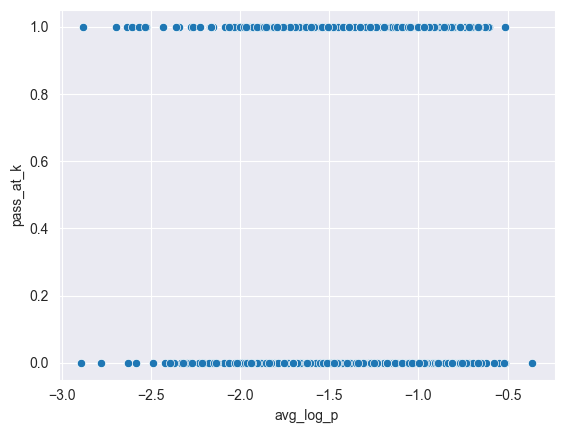

In [16]:
sns.scatterplot(data=df_aggregated, y="pass_at_k", x="avg_log_p")